In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Loading

In [2]:
df = pd.read_csv('data/parkinsons_updrs.data')

In [3]:
X_train_scaled = pd.read_pickle('data/X_train_scaled.pkl')
X_test_scaled = pd.read_pickle('data/X_test_scaled.pkl')
y_train_common = pd.read_pickle('data/y_train_common.pkl')
y_train_motor = pd.read_pickle('data/y_train_motor.pkl')
y_train_total = pd.read_pickle('data/y_train_total.pkl')

In [4]:
X_train_scaled

,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,RPDE,DFA,PPE,age,test_time,Shimmer(dB),HNR
149,0,0.00600,0.000048,0.00302,0.00294,0.00907,0.03866,0.02058,0.02464,0.02778,0.06175,0.019901,0.54100,0.75905,0.19288,0.310345,0.036989,0.156893,0.509150
150,0,0.00810,0.000064,0.00418,0.00457,0.01253,0.04927,0.02715,0.02974,0.03218,0.08144,0.026285,0.48799,0.76679,0.22277,0.310345,0.068611,0.194959,0.426735
151,0,0.00804,0.000062,0.00385,0.00435,0.01155,0.03678,0.02037,0.02216,0.02621,0.06111,0.024588,0.49372,0.78209,0.29585,0.310345,0.100270,0.153292,0.447182
152,0,0.00680,0.000049,0.00350,0.00319,0.01050,0.05083,0.02733,0.03268,0.03511,0.08198,0.034226,0.54635,0.73637,0.21570,0.310345,0.132287,0.234053,0.427358
153,0,0.00375,0.000028,0.00201,0.00209,0.00603,0.03091,0.01684,0.01845,0.02269,0.05052,0.011958,0.44009,0.73302,0.18964,0.310345,0.164173,0.125000,0.503050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.00973,0.01133,0.01549,0.02920,0.025137,0.64215,0.55314,0.21367,0.413793,0.669173,0.068930,0.569349
5871,0,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.01052,0.01277,0.01904,0.03157,0.011927,0.52598,0.56518,0.12621,0.413793,0.701255,0.097222,0.587267
5872,0,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.01371,0.01456,0.01877,0.04112,0.017701,0.47792,0.57888,0.14157,0.413793,0.733018,0.112140,0.662785
5873,0,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.00693,0.00870,0.01307,0.02078,0.007984,0.56865,0.56327,0.14204,0.413793,0.764462,0.054012,0.640500


In [5]:
# sns.set(style="whitegrid")
# sns.pairplot(df, diag_kind="kde", markers='o', hue='subject#', palette='husl')
# plt.savefig('pairplot.png')

In [6]:
# df.drop(columns=['subject#'], inplace=True)

## Box plot of the features (for outliers)

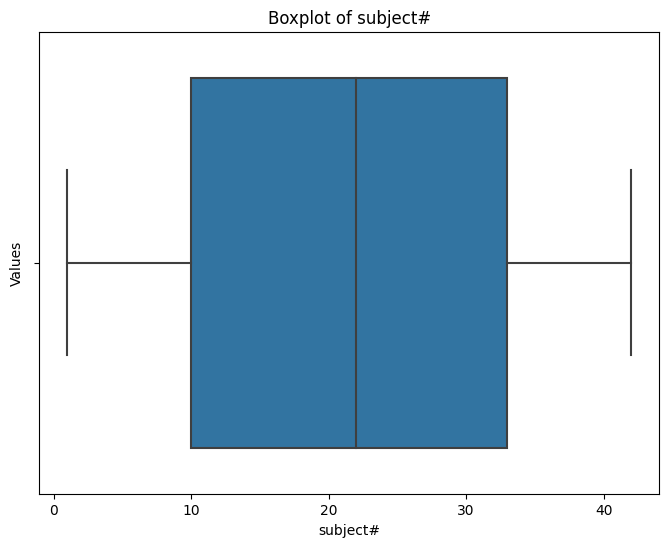

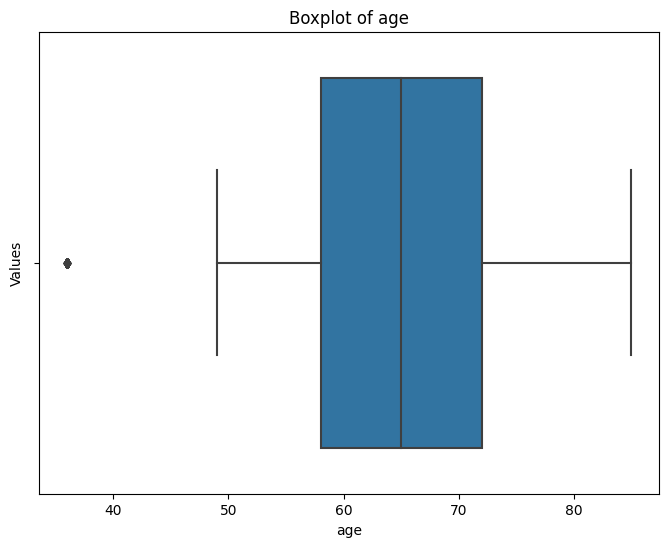

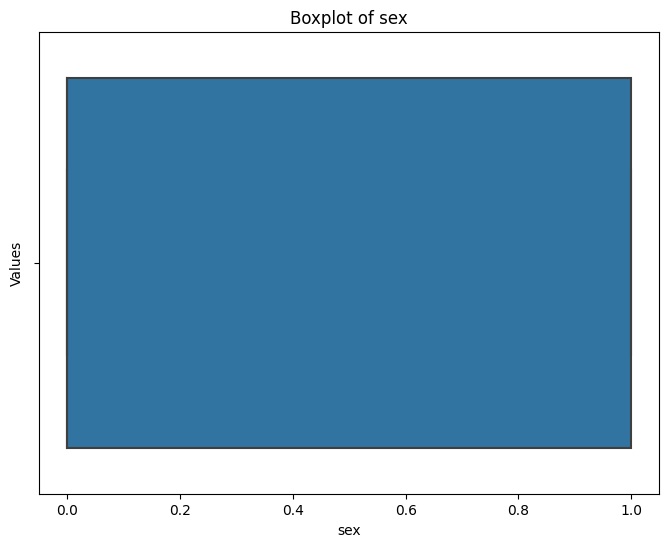

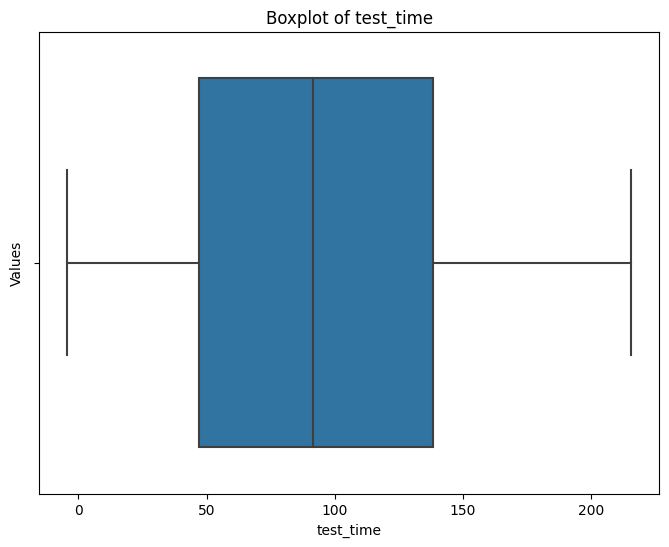

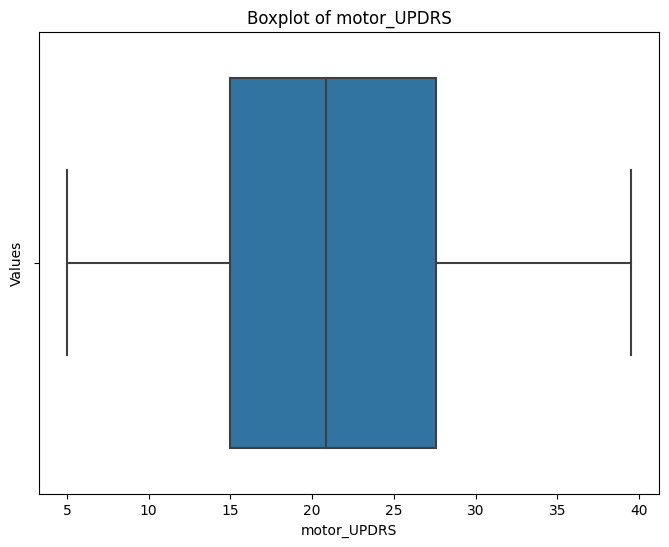

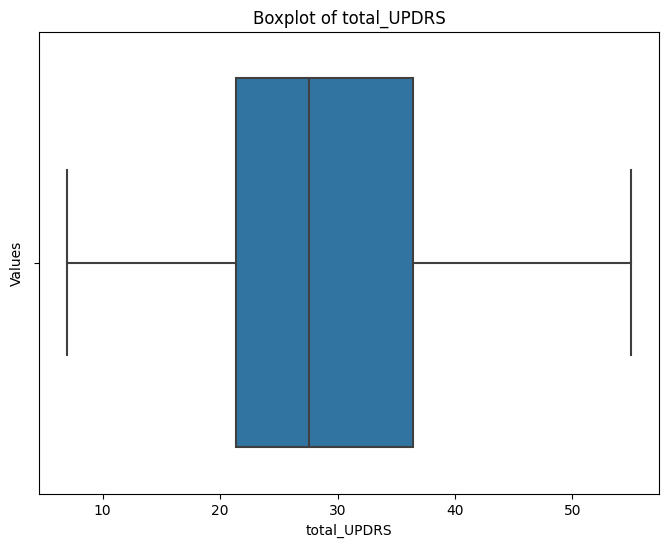

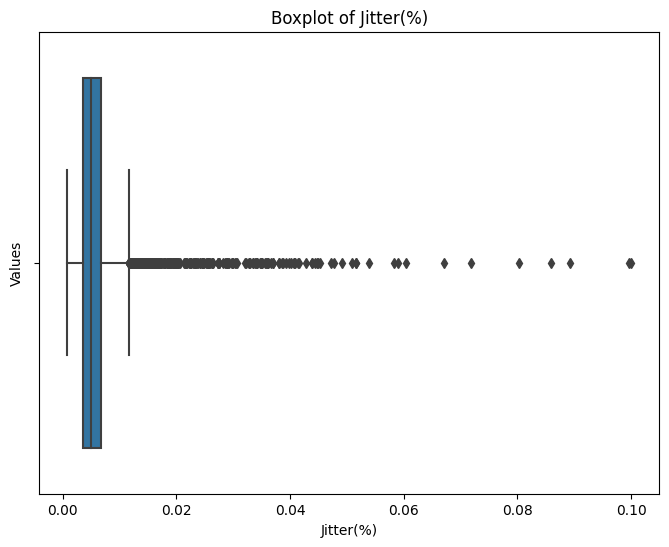

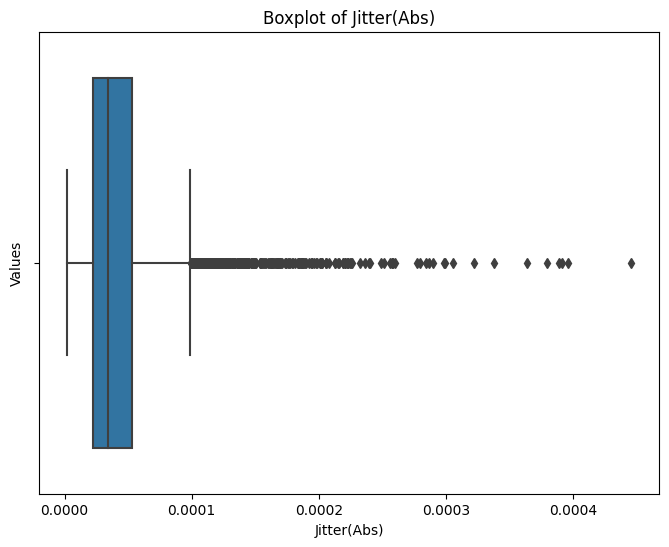

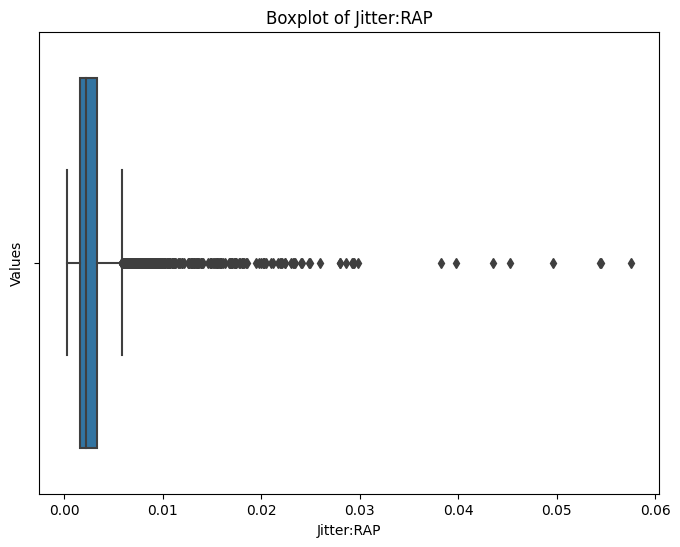

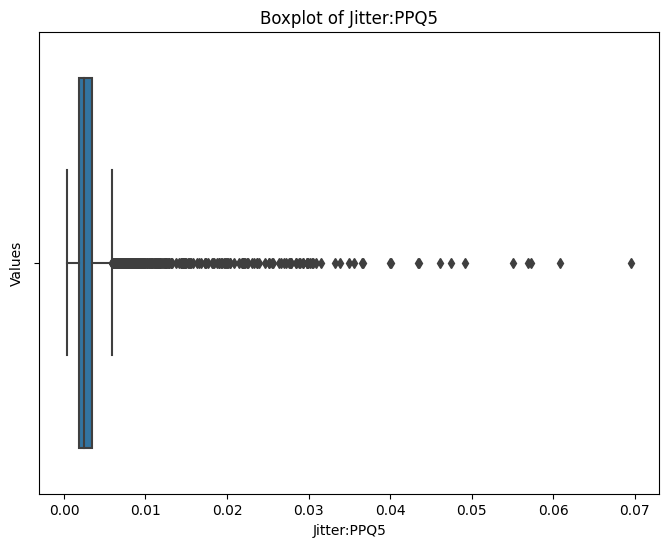

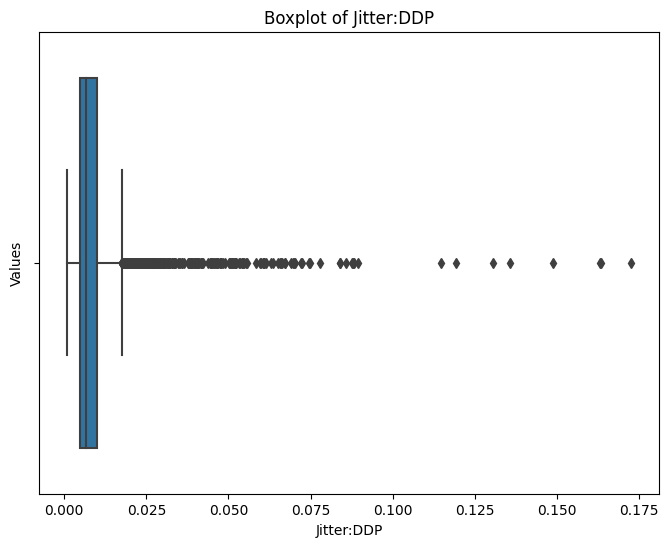

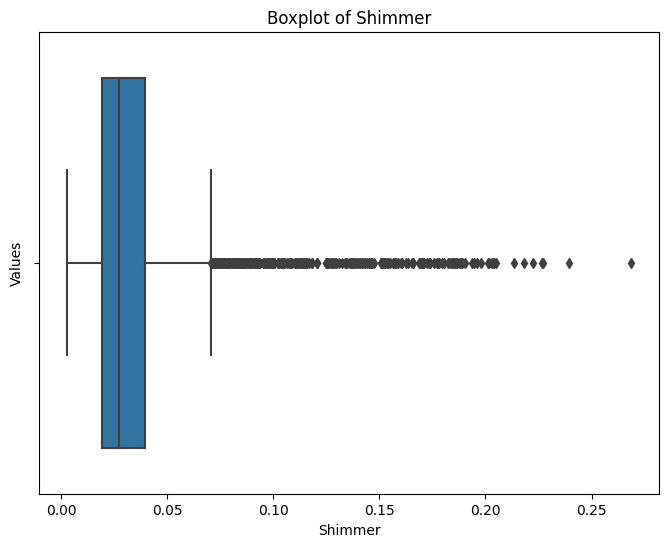

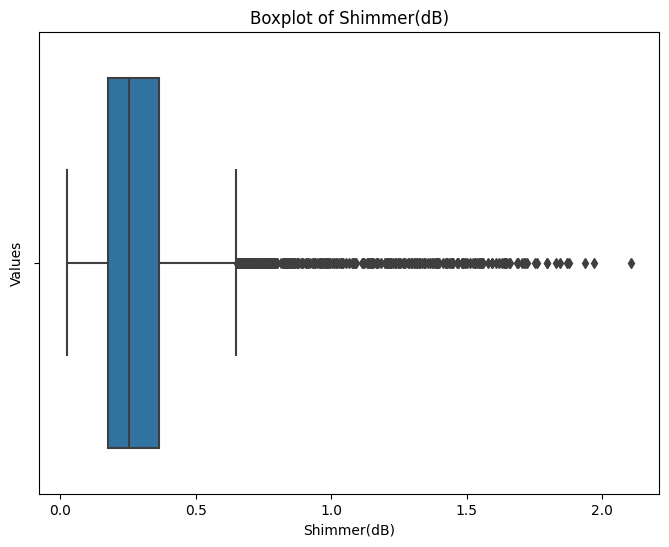

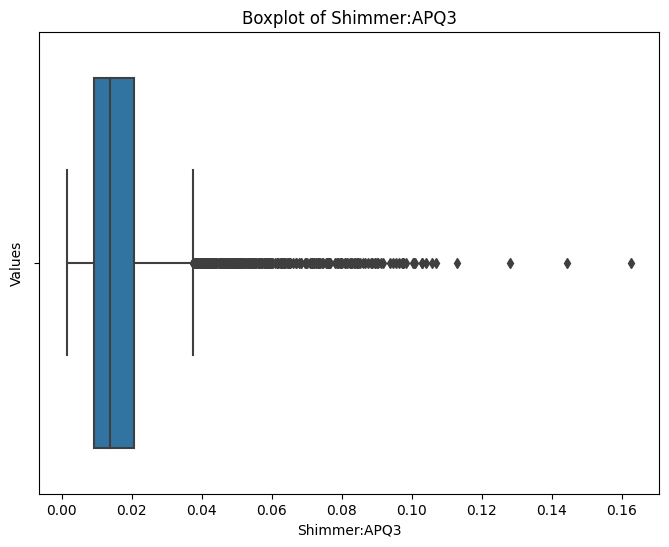

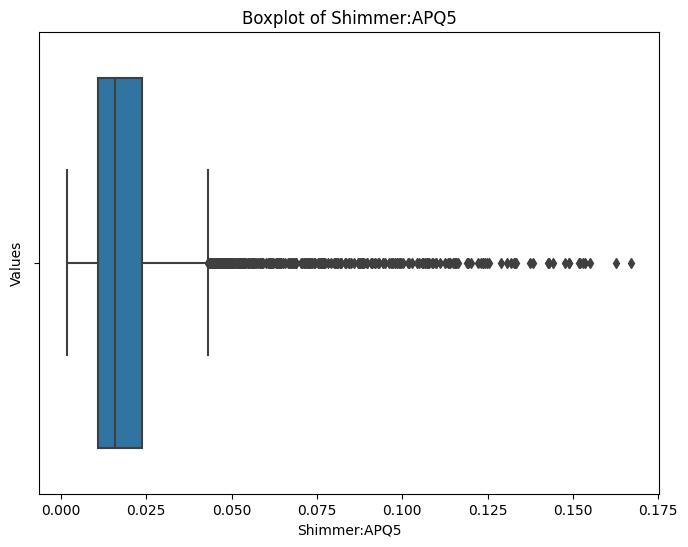

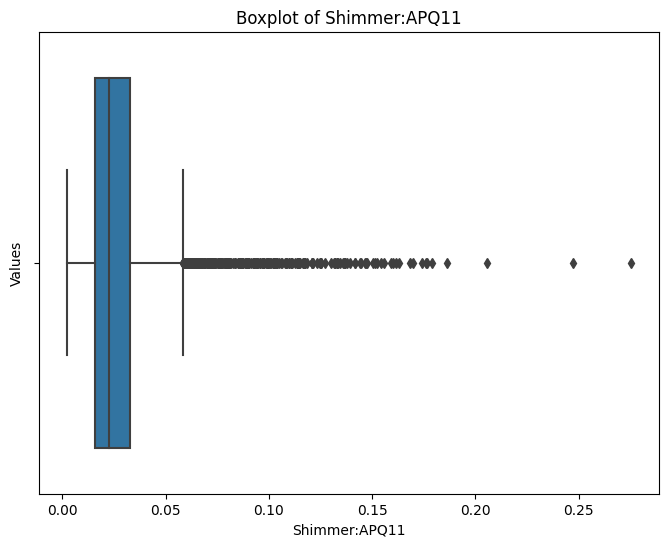

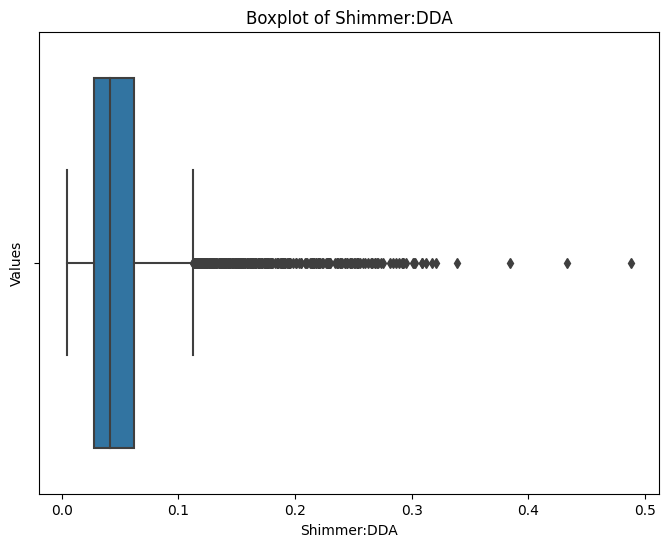

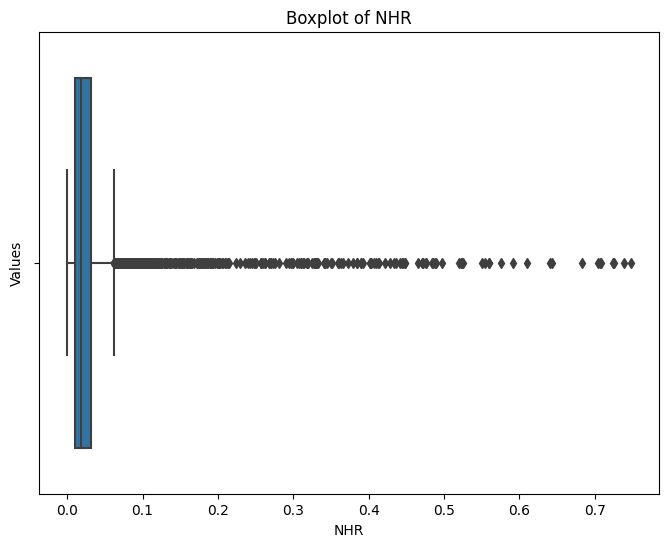

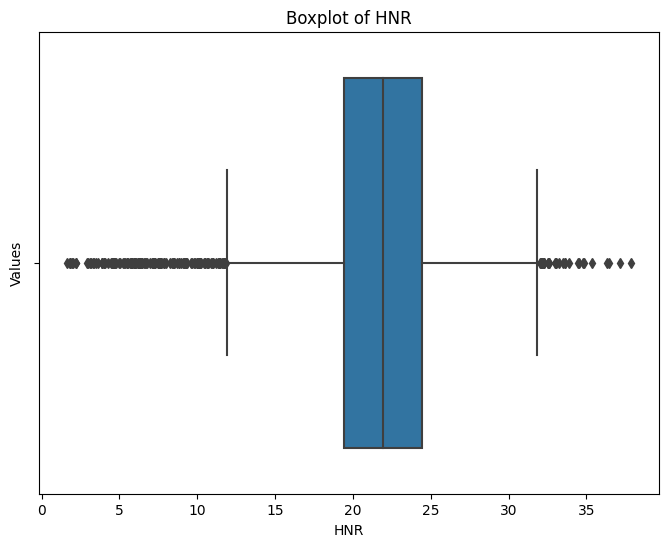

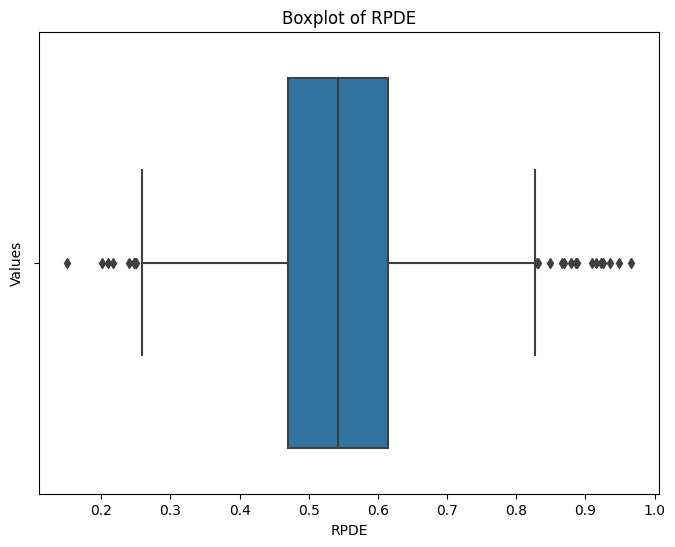

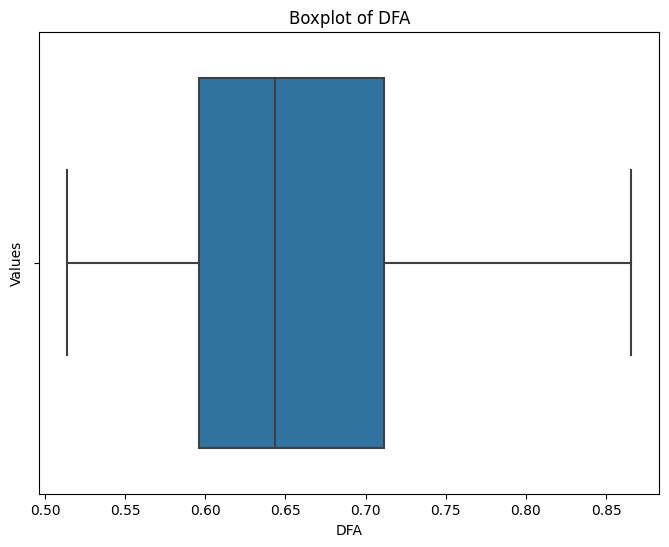

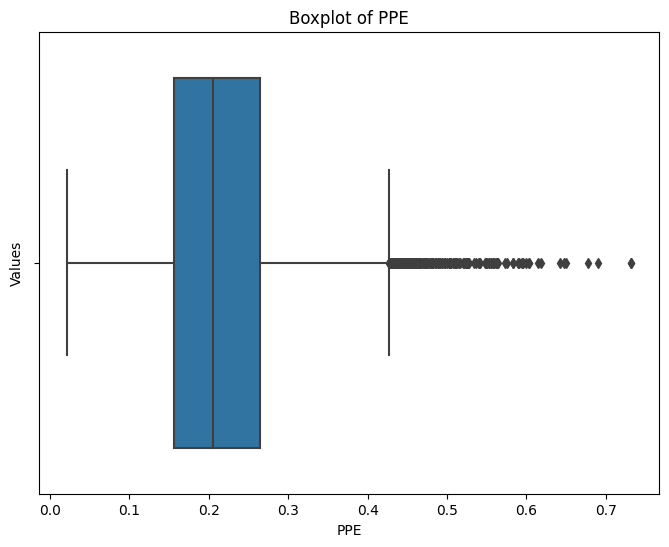

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_columns:
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()


## PCA

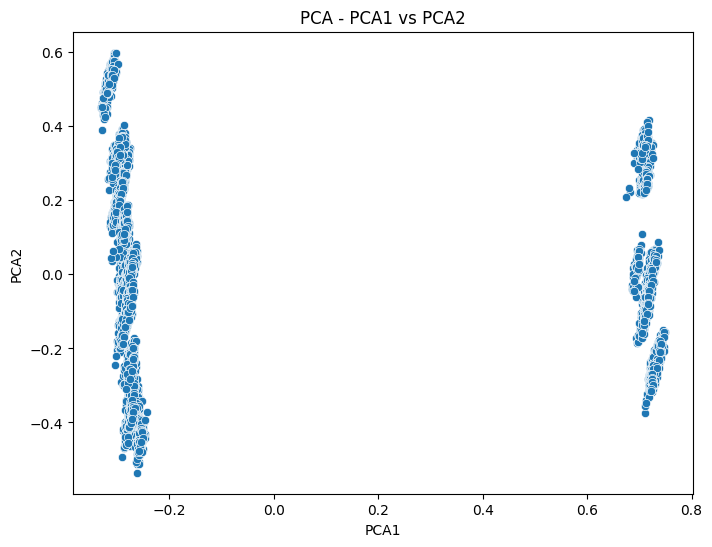

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1])
plt.title('PCA - PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Not Good!

let's cluster the pca

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


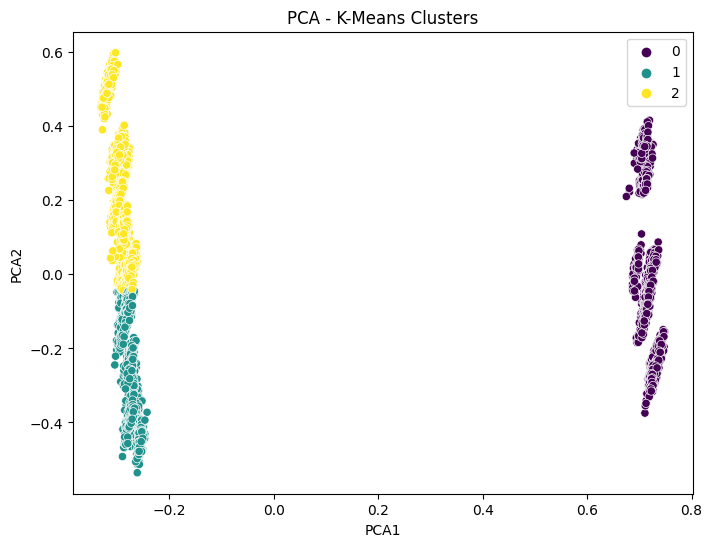

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_train_pca) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('PCA - K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

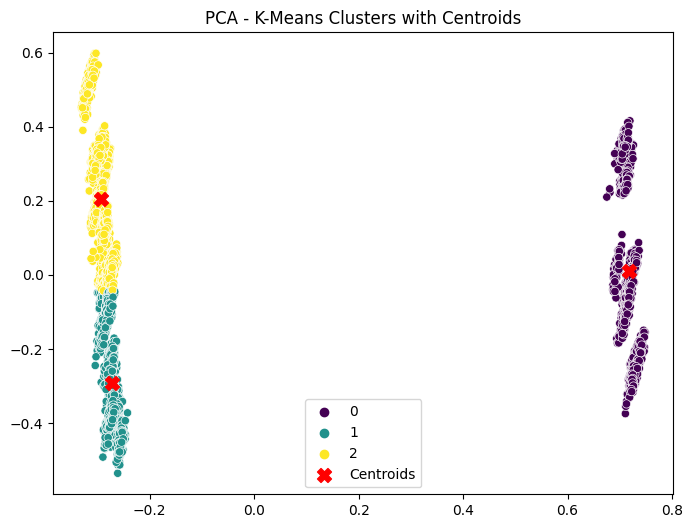

In [10]:
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('PCA - K-Means Clusters with Centroids')
plt.legend()
plt.show()

In [11]:
silhouette_avg = silhouette_score(X_train_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6598791698427989


Not bad

**Agglomerative Clustering might be good for feature selection**

## TSNE

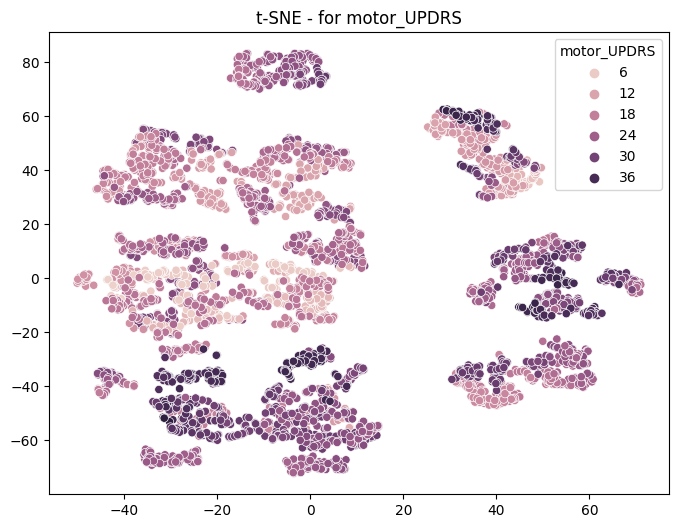

In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_motor)
plt.title('t-SNE - for motor_UPDRS')
plt.show()

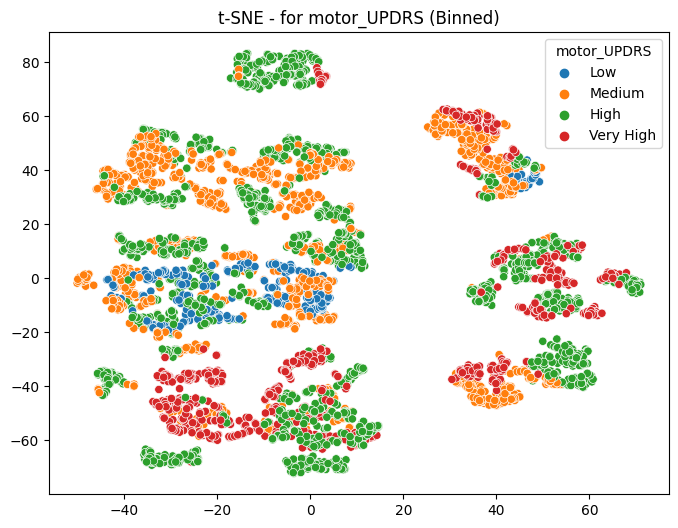

In [6]:
bins = [0, 10, 20, 30, 40] 
labels = ['Low', 'Medium', 'High', 'Very High']
y_train_motor_binned = pd.cut(y_train_motor, bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_motor_binned)
plt.title('t-SNE - for motor_UPDRS (Binned)')
plt.show()


Check for other target!

## Correlation Analysis

In [14]:
correlation_matrix = X_train_scaled.corr()

correlation_target_motor = X_train_scaled.corrwith(y_train_motor)
correlation_target_total = X_train_scaled.corrwith(y_train_total)

correlation_targets = y_train_motor.corr(y_train_total)

print(f"Correlation between motor_UPDRS and total_UPDRS: {correlation_targets}")
print("\nCorrelation with motor_UPDRS:")
print(correlation_target_motor)
print("\nCorrelation with total_UPDRS:")
print(correlation_target_total)

Correlation between motor_UPDRS and total_UPDRS: 0.9316957089733273

Correlation with motor_UPDRS:
sex              0.130565
Jitter(%)        0.120692
Jitter(Abs)      0.041483
Jitter:RAP       0.103595
Jitter:PPQ5      0.133055
Jitter:DDP       0.103637
Shimmer          0.125223
Shimmer:APQ3     0.099333
Shimmer:APQ5     0.125547
Shimmer:APQ11    0.169374
Shimmer:DDA      0.099333
NHR              0.087422
RPDE             0.132934
DFA              0.006605
PPE              0.178378
age              0.240842
test_time        0.086094
Shimmer(dB)      0.130887
HNR             -0.215412
dtype: float64

Correlation with total_UPDRS:
sex              0.040499
Jitter(%)        0.096995
Jitter(Abs)      0.067949
Jitter:RAP       0.083037
Jitter:PPQ5      0.105880
Jitter:DDP       0.083067
Shimmer          0.111151
Shimmer:APQ3     0.092824
Shimmer:APQ5     0.114735
Shimmer:APQ11    0.143694
Shimmer:DDA      0.092824
NHR              0.071140
RPDE             0.157384
DFA             -0.0022

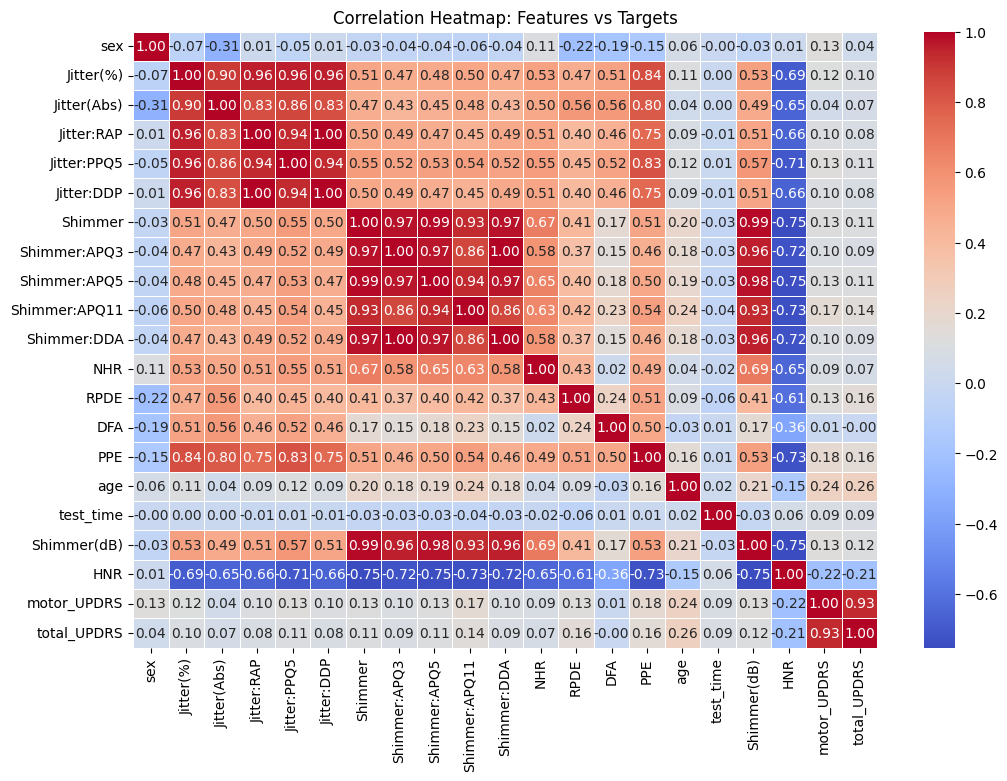

In [15]:
X_train_with_targets = X_train_scaled.copy()
X_train_with_targets['motor_UPDRS'] = y_train_motor
X_train_with_targets['total_UPDRS'] = y_train_total

correlation_matrix = X_train_with_targets.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Features vs Targets')
plt.show()